# Testes da rotina da classe do Mapa Logístico

## 1. Importando as bibliotecas necessárias

### Bibliotecas obrigatórias

In [7]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns # a biblioteca 'seaborn' contém vários estilos para os gráficos do 'matpĺotlib'

# agora, melhoramos a qualidade de saida e de visualizacao da imagem 
# alem de mudar a fonte padrao para uma do latex
sns.set_style("ticks")
plt.rcParams['savefig.dpi'] = 200
plt.rcParams["figure.dpi"] = 150

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

plt.style.use('dark_background')

### Bibliotecas não-obrigatórias

In [8]:
import sys 
sys.path.insert(0, '../../../scripts')
import logisticmap as lm

## 2. Definindo a função (debug)

Não é necessário executar essa linha se você estiver importando o arquivo com a classe.

In [9]:
class MapaLogistico:

    def __init__(self, estado_inicial, r=3.86):
        """
        Descrição:
        ----------
        Construtor da classe 'MapaHenon'

        Parâmetros:
        -----------
        estado_inicial: np.ndarray
            Parâmetro da população x inicial do mapa e do instante n inicial (deve ser 0)
        r: float
            Parâmetro do Mapa Logístico representando a taxa de crescimento populacional. Deve ser entre 0.0 e 4.0
            
        Retorna:
        --------
        Nada
        """

        if not ((type(r) is float) & ((r >= 0) & (r <= 4) )):
            raise TypeError("A taxa de crescimento populacional deve ser um float entre 0.0 e 4.0!")
            
        if not (type(estado_inicial) is np.ndarray):
            raise TypeError("O vetor estado inicial deve ser um array do numpy!")            
            
        if not ((type(estado_inicial[0]) is np.float64) & ((estado_inicial[0] >= 0) & (estado_inicial[0] <= 1))):
            raise TypeError("A população inicial deve ser um float entre 0 e 1!")
            
        if not (estado_inicial[1] == 0):
            raise ValueError("O instante inicial deve ser igual a 0!")    

        self._r = r
        self._x_atual = estado_inicial[0]
        self._n_atual = estado_inicial[1]
        pass

    def iterar(self):
        """
        Descrição:
        ----------
        Aplicar as equações de diferenças do Mapa Logístico para os pontos e parâmetrs atuais

        Parâmetros:
        -----------
        Nenhum
        
        Retorna:
        --------
        Nada
        """
        
        r = self._r
        x = self._x_atual
        n = self._n_atual

        prox_x = r*x*(1 - x)
        self._x_atual = prox_x
        self._n_atual = n + 1
        pass
    
    def atualizar_r(self, r=3.86):
        """
        Descrição:
        ----------
        Atualizar a taxa de crescimento do mapa
        
        Parâmetros:
        -----------
        r: float
            Parâmetro do Mapa Logístico representando a taxa de crescimento populacional. Deve ser entre 0.0 e 4.0
            
        Retorna:
        --------
        Nada
        """
        
        if not ((type(r) is float) & ((r >= 0) & (r <= 4) )):
            raise TypeError("A taxa de crescimento populacional deve ser um float entre 0.0 e 4.0!")
        
        self._r = r
        pass

    def atualizar_estado(self, estado):
        """
        Descrição:
        ----------
        Atualizar o estado do mapa (sem aplicar a regra)
        
        Parâmetros:
        -----------
        estado_inicial: np.ndarray
            Parâmetro da população x do mapa e do instante n 
            
        Retorna:
        --------
        Nada
        """
        
        if not (type(estado) is np.ndarray):
            raise TypeError("O vetor estado deve ser um array do numpy!")            
            
        if not ((type(estado[0]) is np.float64) & ((estado[0] >= 0) & (estado[0] <= 1))):
            raise TypeError("A população deve ser um float entre 0 e 1!")
        
        self._x_atual = estado[0]
        self._n_atual = estado[1]
        pass    

    def ler_estado(self):
        """
        Descrição:
        ----------
        Retorna o estado atual (x, n) do mapa

        Parâmetros:
        -----------
        Nenhum
        
        Retorna:
        --------
        Um array do numpy (np.ndarray) com o estado (x, n) atual do mapa
        """

        x = self._x_atual
        n = self._n_atual
        
        estado = np.array([x, n])
        return estado

## 3. Gerando a série temporal para $r = 3.86$

In [10]:
x_inicial = 0.5
n_inicial = 0
r=3.86

estados = np.array([x_inicial, n_inicial])

mapa = lm.MapaLogistico(estado_inicial=estados)

In [11]:
n_iteracoes = 500

for n in range(0, n_iteracoes):
    mapa.iterar()
    estados = np.vstack((estados, mapa.ler_estado()))

In [12]:
x = estados[:, 0]
n = estados[:, 1]

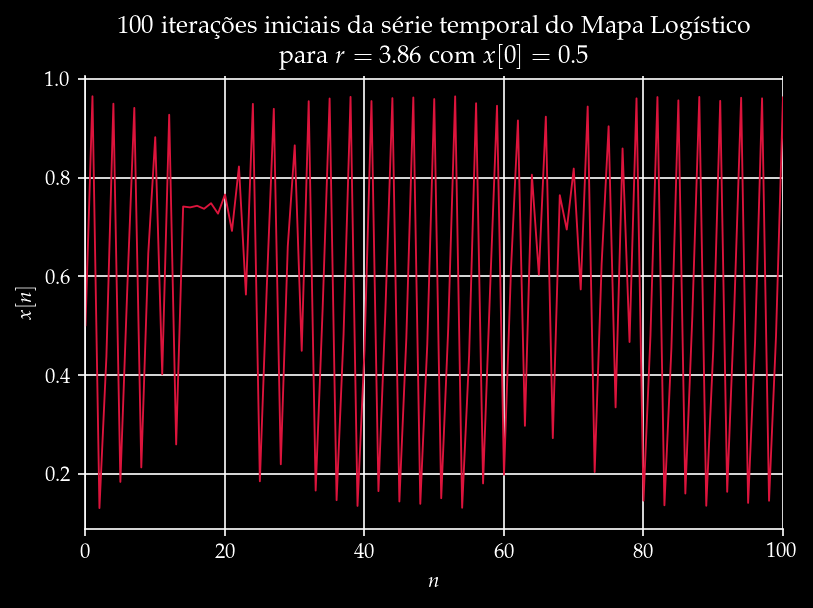

In [13]:
fig, ax = plt.subplots()
ax.plot(n, x, color='Crimson', linewidth=0.9)

ax.set_title("100 iterações iniciais da série temporal do Mapa Logístico\n para $r =$ " + str(r) + " com $x[0] =$ " + str(x[0]))
ax.set_ylabel('$x[n]$')
ax.set_xlabel('$n$')
ax.set_xlim(0, 100)
    
ax.grid(True)
sns.despine()

plt.show()
fig.savefig("../../../images/caos/logistic-map/series-temporais.png")

## 4. Gerando o diagrama de Bifurcação

In [21]:
conjunto_r = np.linspace(0.0, 4.0, 1000)

In [22]:
x_inicial = 0.5
n_inicial = 0
estado_inicial = np.array([x_inicial, n_inicial])

In [23]:
n_iteracoes = 1000
n_valores_finais = int(0.1*n_iteracoes)

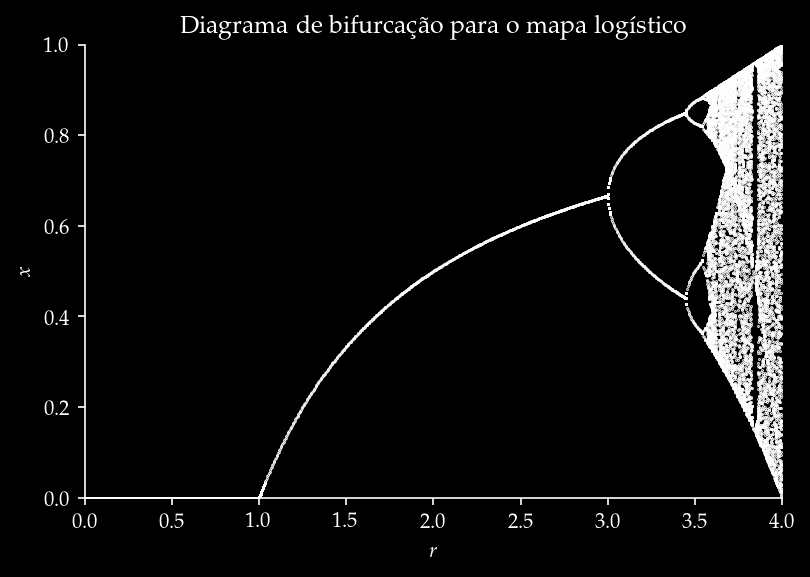

In [24]:
fig, ax = plt.subplots()
ax.set_title("Diagrama de bifurcação para o mapa logístico")
ax.set_ylabel('$x$')
ax.set_xlabel('$r$')
ax.set_xlim(0, 4)
ax.set_ylim(0, )
ax.grid(False)
sns.despine()

x_plot = []
r_plot = []
mapa_log = MapaLogistico(r=0.0, estado_inicial=estado_inicial)

for ri in range(0, len(conjunto_r)):
    
    estados = estado_inicial
    mapa_log.atualizar_estado(estados)
    mapa_log.atualizar_r(float(conjunto_r[ri]))
    
    for iteracao in range(0, n_iteracoes):
        mapa_log.iterar()
        estados = np.vstack((estados, mapa_log.ler_estado()))
    
    x = estados[:, 0]    
    x_unicos = np.unique(x[-n_valores_finais:])
    r_unicos = conjunto_r[ri]*np.ones(len(x_unicos))

    ax.scatter(r_unicos, x_unicos, color='White', marker='.', s=0.5)
    
plt.show()
fig.savefig("../../../images/caos/logistic-map/mapa-logistico.png")